In [1]:
#total_ring_mass.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 11 July 2018.
#compare evolutions

In [2]:
#restore output
dirs = ['0.2/', '0.5/', '0.67/', '1.0/', '1.5/', '2.0/', '3.0/']
labels = dirs
from helper_fns import *
from libration import *
everything = []
for dir in dirs:
    inputs_file = dir + 'inputs.py'
    execfile(inputs_file)
    output_folder = dir + output_folder
    r, t, vr, vt, times, monitor = restore_output(output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    viscous_timescale = (radial_width**2)/(12*np.abs(shear_viscosity))
    print 'dir = ', dir
    print 'output_folder = ', output_folder
    print 'shear_viscosity = ', shear_viscosity
    print 'bulk_viscosity = ', bulk_viscosity
    print 'total_ring_mass = ', total_ring_mass
    print 'G_ring = ', G_ring
    print 'J2 = ', J2
    print 'r.shape = ', r.shape
    print 'viscous_timescale = ', viscous_timescale
    times_viscous = times/viscous_timescale
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    everything += [(r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, 
        e_prime, wt_prime, radial_width)]

dir =  0.2/
output_folder =  0.2/output
shear_viscosity =  1e-13
bulk_viscosity =  1e-13
total_ring_mass =  2e-11
G_ring =  1.0
J2 =  0.01
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.333333333332
dir =  0.5/
output_folder =  0.5/output
shear_viscosity =  1e-13
bulk_viscosity =  1e-13
total_ring_mass =  5e-11
G_ring =  1.0
J2 =  0.01
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.333333333332
dir =  0.67/
output_folder =  0.67/output
shear_viscosity =  1e-13
bulk_viscosity =  1e-13
total_ring_mass =  6.7e-11
G_ring =  1.0
J2 =  0.01
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.333333333332
dir =  1.0/
output_folder =  1.0/output
shear_viscosity =  1e-13
bulk_viscosity =  1e-13
total_ring_mass =  1e-10
G_ring =  1.0
J2 =  0.01
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.333333333332
dir =  1.5/
output_folder =  1.5/output
shear_viscosity =  1e-13
bulk_viscosity =  1e-13
total_ring_mass =  1.5e-10
G_ring =  1.0
J2 =  0.01
r.shape =  (1001, 2, 241)
viscous_times

In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

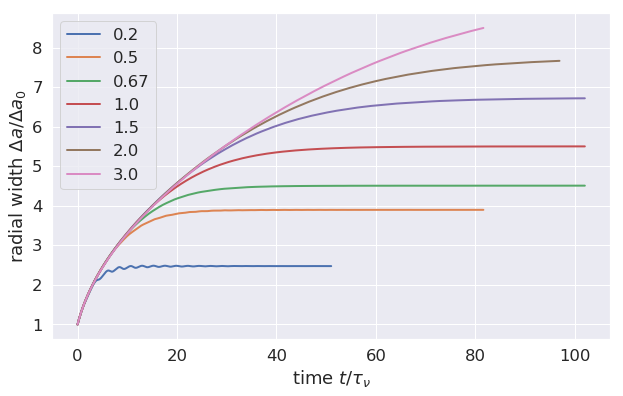

In [4]:
#plot delta_a versus times_viscous
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, radial_width = everything[idx]
    x = times_viscous
    y = da/da[0]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=dir[:-1])
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

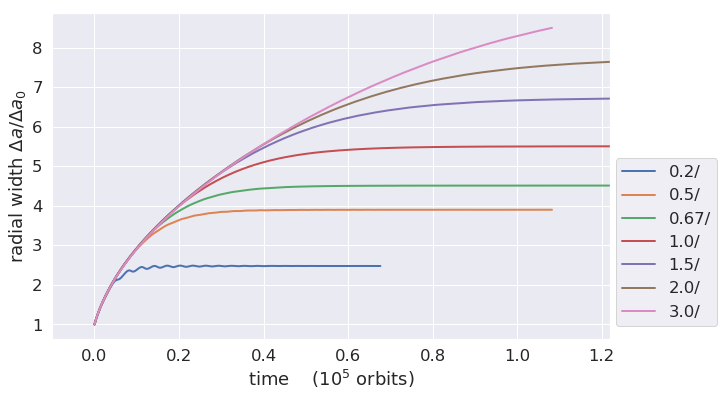

In [5]:
#plot delta_a versus times
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, radial_width = everything[idx]
    x = times/(2*np.pi)/1.0e5
    y = da/da[0]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time    ($10^5$ orbits)')
p = ax.set_xlim(-0.1, 1.22)
p = plt.legend(loc=(1.01, 0.04))

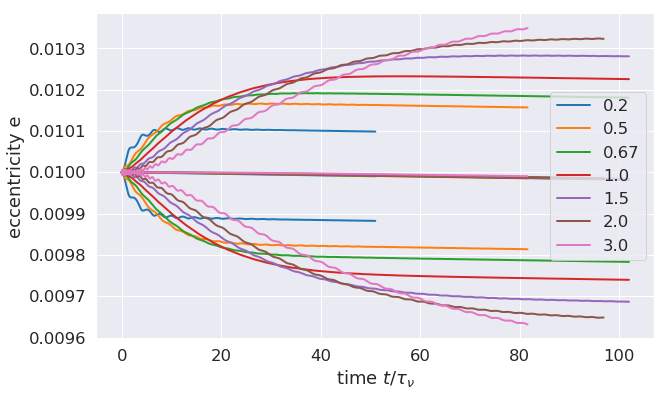

In [6]:
#plot eccentricity versus times_viscous
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, radial_width = everything[idx]
    e_inner = e[:, 0, :].mean(axis=1)
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    e_avg = (e_inner + e_outer)/2
    color = color_seq[idx]
    x = times_viscous
    y = e_outer
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=None)
    y = e_avg
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=dir[:-1])
    y = e_inner
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=None)
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend(loc='center right')

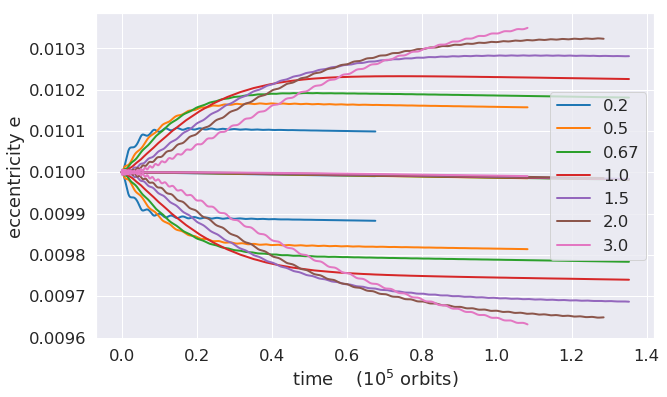

In [7]:
#plot eccentricity versus times
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, radial_width = everything[idx]
    e_inner = e[:, 0, :].mean(axis=1)
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    e_avg = (e_inner + e_outer)/2
    color = color_seq[idx]
    x = times/(2*np.pi)/1.0e5
    y = e_outer
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=None)
    y = e_avg
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=dir[:-1])
    y = e_inner
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=None)
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time    ($10^5$ orbits)')
p = plt.legend(loc='center right')

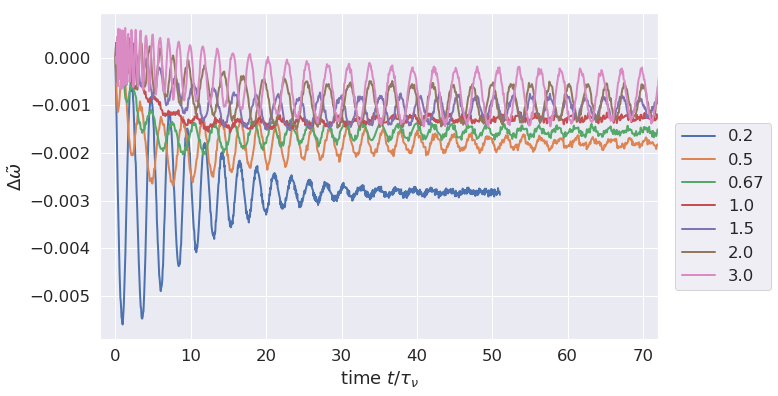

In [8]:
#plot delta_wt versus times_viscous
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, radial_width = everything[idx]
    x = times_viscous
    y = dwt
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=dir[:-1])
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$')
p = ax.set_xlim(-2, 72)
p = plt.legend(loc=(1.03, 0.15))

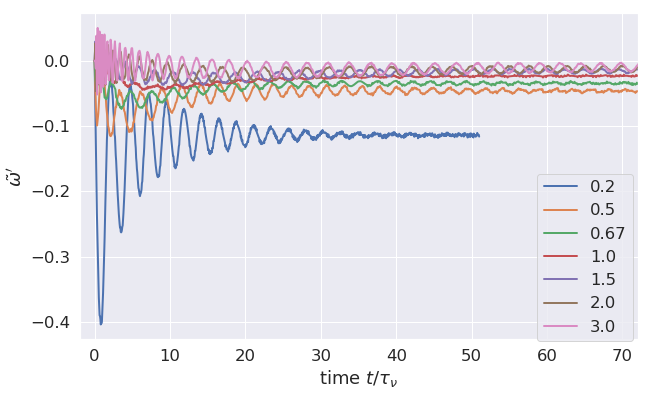

In [9]:
#plot wt_prime versus times_viscous
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, radial_width = everything[idx]
    x = times_viscous
    y = wt_prime
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=dir[:-1])
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$\tilde{\omega}'$")
p = ax.set_xlim(-2, 72)
p = plt.legend(loc=(0.82, -0.006))

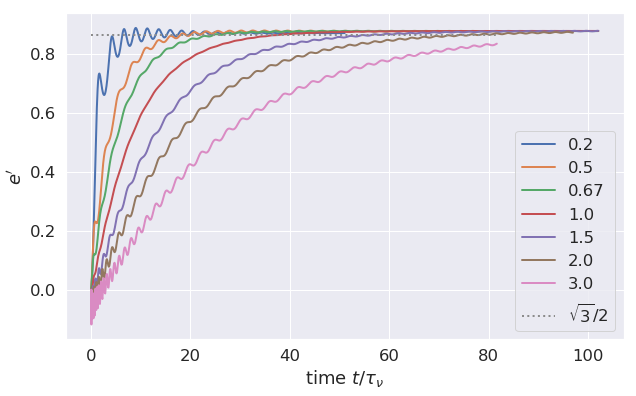

In [10]:
#plot e_prime versus times_viscous
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, radial_width = everything[idx]
    x = times_viscous
    y = e_prime
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=dir[:-1])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel(r"$e'$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

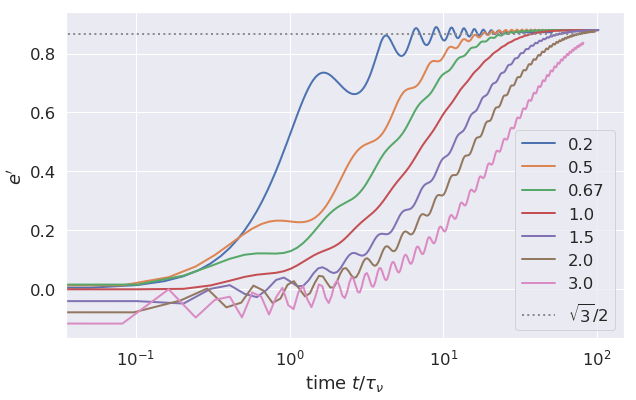

In [11]:
#plot e_prime versus times_viscous
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, radial_width = everything[idx]
    x = times_viscous
    y = e_prime
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=dir[:-1])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel(r"$e'$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_xscale('log')
p = plt.legend()

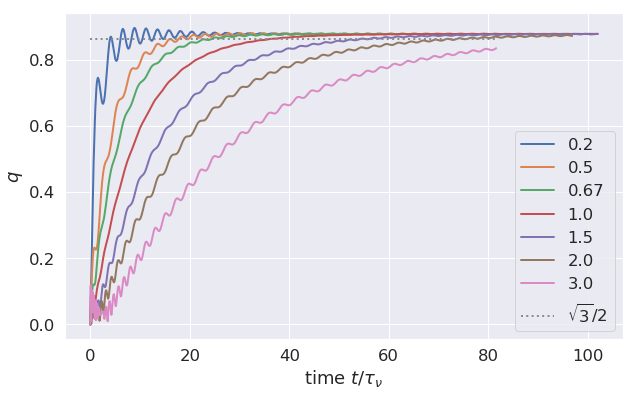

In [12]:
#plot q versus times_viscous
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, viscous_timescale, da, dwt, q, \
        e_prime, wt_prime, radial_width = everything[idx]
    x = times_viscous
    y = q
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=dir[:-1])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel(r"$q$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()